In [200]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Inserciones

In [201]:
df_id = pd.read_csv("inserciones_id.csv")
df_usr = pd.read_csv("inserciones_username.csv")
df_dv_id = pd.read_csv("dv_inserciones_id.csv")
df_dv_usr = pd.read_csv("dv_inserciones_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.579802  1.190674  1.676126  2.251815   
1      hashing_cerrado_lineal  0.461805  0.954036  1.350455  1.816044   
2  hashing_cerrado_cuadratico  0.472379  0.963096  1.338969  1.815842   
3       hashing_cerrado_doble  0.462561  0.968409  1.367827  1.869059   
4          std::unordered_map  0.453201  0.900214  1.343401  1.756633   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  3.068104  3.496606  3.975976  4.620675  5.047049  ...  6.798281  7.528973   
1  2.406351  2.847415  3.204728  3.680852  4.056450  ...  5.330439  5.933795   
2  2.395657  2.865535  3.209449  3.642738  4.083561  ...  5.340481  5.901919   
3  2.477686  2.921555  3.293724  3.779908  4.182095  ...  5.475017  6.077149   
4  2.284377  2.955358  3.215422  3.642453  3.975725  ...  5.787894  6.373685   

      13000     14000     15000     16000     17000      18000      19000  \
0  

In [202]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="inserciones", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="inserciones", value_name="tiempo")

df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_inserciones", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_inserciones", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())


df_id_melted['inserciones'] = df_id_melted['inserciones'].astype(int)
df_usr_melted['inserciones'] = df_usr_melted['inserciones'].astype(int)

                         mapa inserciones    tiempo  tiempo_err
0             hashing_abierto        1000  0.579802    0.088053
1      hashing_cerrado_lineal        1000  0.461805    0.084799
2  hashing_cerrado_cuadratico        1000  0.472379    0.103267
3       hashing_cerrado_doble        1000  0.462561    0.078872
4          std::unordered_map        1000  0.453201    0.061473
                         mapa inserciones    tiempo  tiempo_err
0             hashing_abierto        1000  0.782813    0.046763
1      hashing_cerrado_lineal        1000  0.669909    0.053085
2  hashing_cerrado_cuadratico        1000  0.654461    0.041905
3       hashing_cerrado_doble        1000  0.837759    0.041415
4          std::unordered_map        1000  0.410523    0.036766


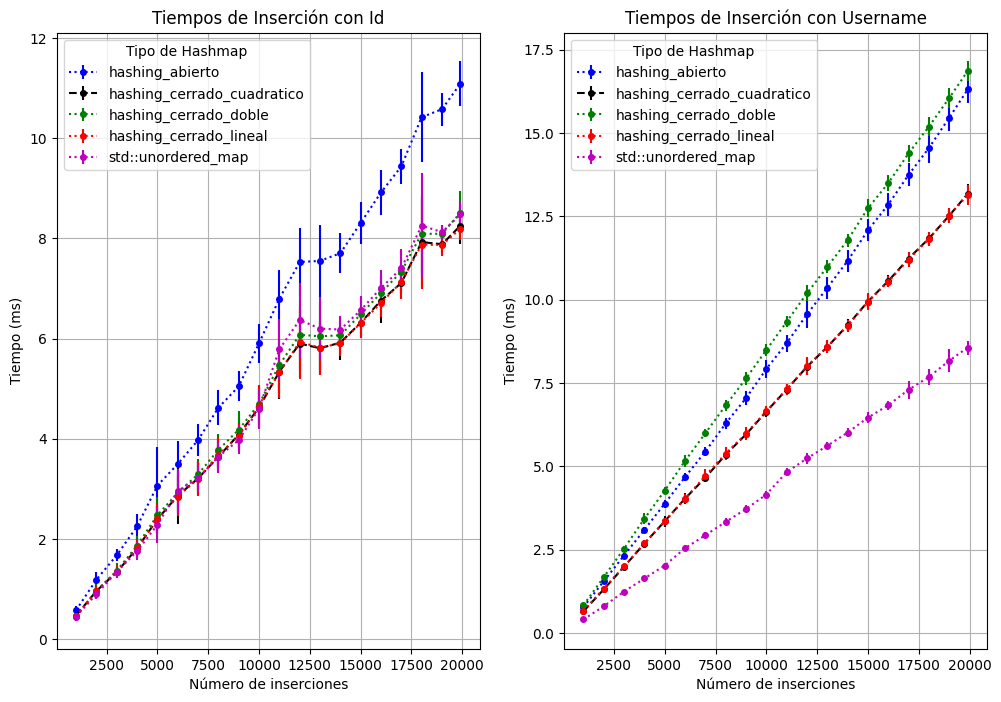

In [203]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,8))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["inserciones"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de inserciones")

axes[0].set(title="Tiempos de Inserción con Id")
axes[1].set(title="Tiempos de Inserción con Username")

plt.savefig("inserciones.png", bbox_inches="tight")
plt.show()


# Busquedas Tipo 1

In [204]:
df_id = pd.read_csv("busquedas1_id.csv")
df_usr = pd.read_csv("busquedas1_username.csv")
df_dv_id = pd.read_csv("dv_busquedas1_id.csv")
df_dv_usr = pd.read_csv("dv_busquedas1_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.195536  0.375274  0.569253  0.764891   
1      hashing_cerrado_lineal  0.061004  0.112521  0.167960  0.222575   
2  hashing_cerrado_cuadratico  0.060905  0.110346  0.172602  0.224812   
3       hashing_cerrado_doble  0.070733  0.131744  0.197976  0.262467   
4          std::unordered_map  0.158312  0.308256  0.469665  0.615127   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  0.991620  1.209467  1.469568  1.719310  2.022150  ...  2.563383  2.795974   
1  0.277334  0.328798  0.390945  0.439328  0.500954  ...  0.625465  0.661312   
2  0.279768  0.329111  0.391101  0.442280  0.505042  ...  0.608952  0.673795   
3  0.325239  0.389891  0.456880  0.520874  0.590806  ...  0.723408  0.791721   
4  0.778360  0.943933  1.137211  1.336959  1.567341  ...  1.974766  2.157955   

      13000     14000     15000     16000     17000     18000     19000  \
0  3.

In [205]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())

df_id_melted["busquedas"] = df_id_melted["busquedas"].astype(int)
df_usr_melted["busquedas"] = df_usr_melted["busquedas"].astype(int)

                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  0.195536    0.053591
1      hashing_cerrado_lineal      1000  0.061004    0.018607
2  hashing_cerrado_cuadratico      1000  0.060905    0.014812
3       hashing_cerrado_doble      1000  0.070733    0.015198
4          std::unordered_map      1000  0.158312    0.031071
                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  0.266271    0.038579
1      hashing_cerrado_lineal      1000  0.254788    0.031500
2  hashing_cerrado_cuadratico      1000  0.255805    0.032579
3       hashing_cerrado_doble      1000  0.434620    0.030217
4          std::unordered_map      1000  0.022693    0.004211


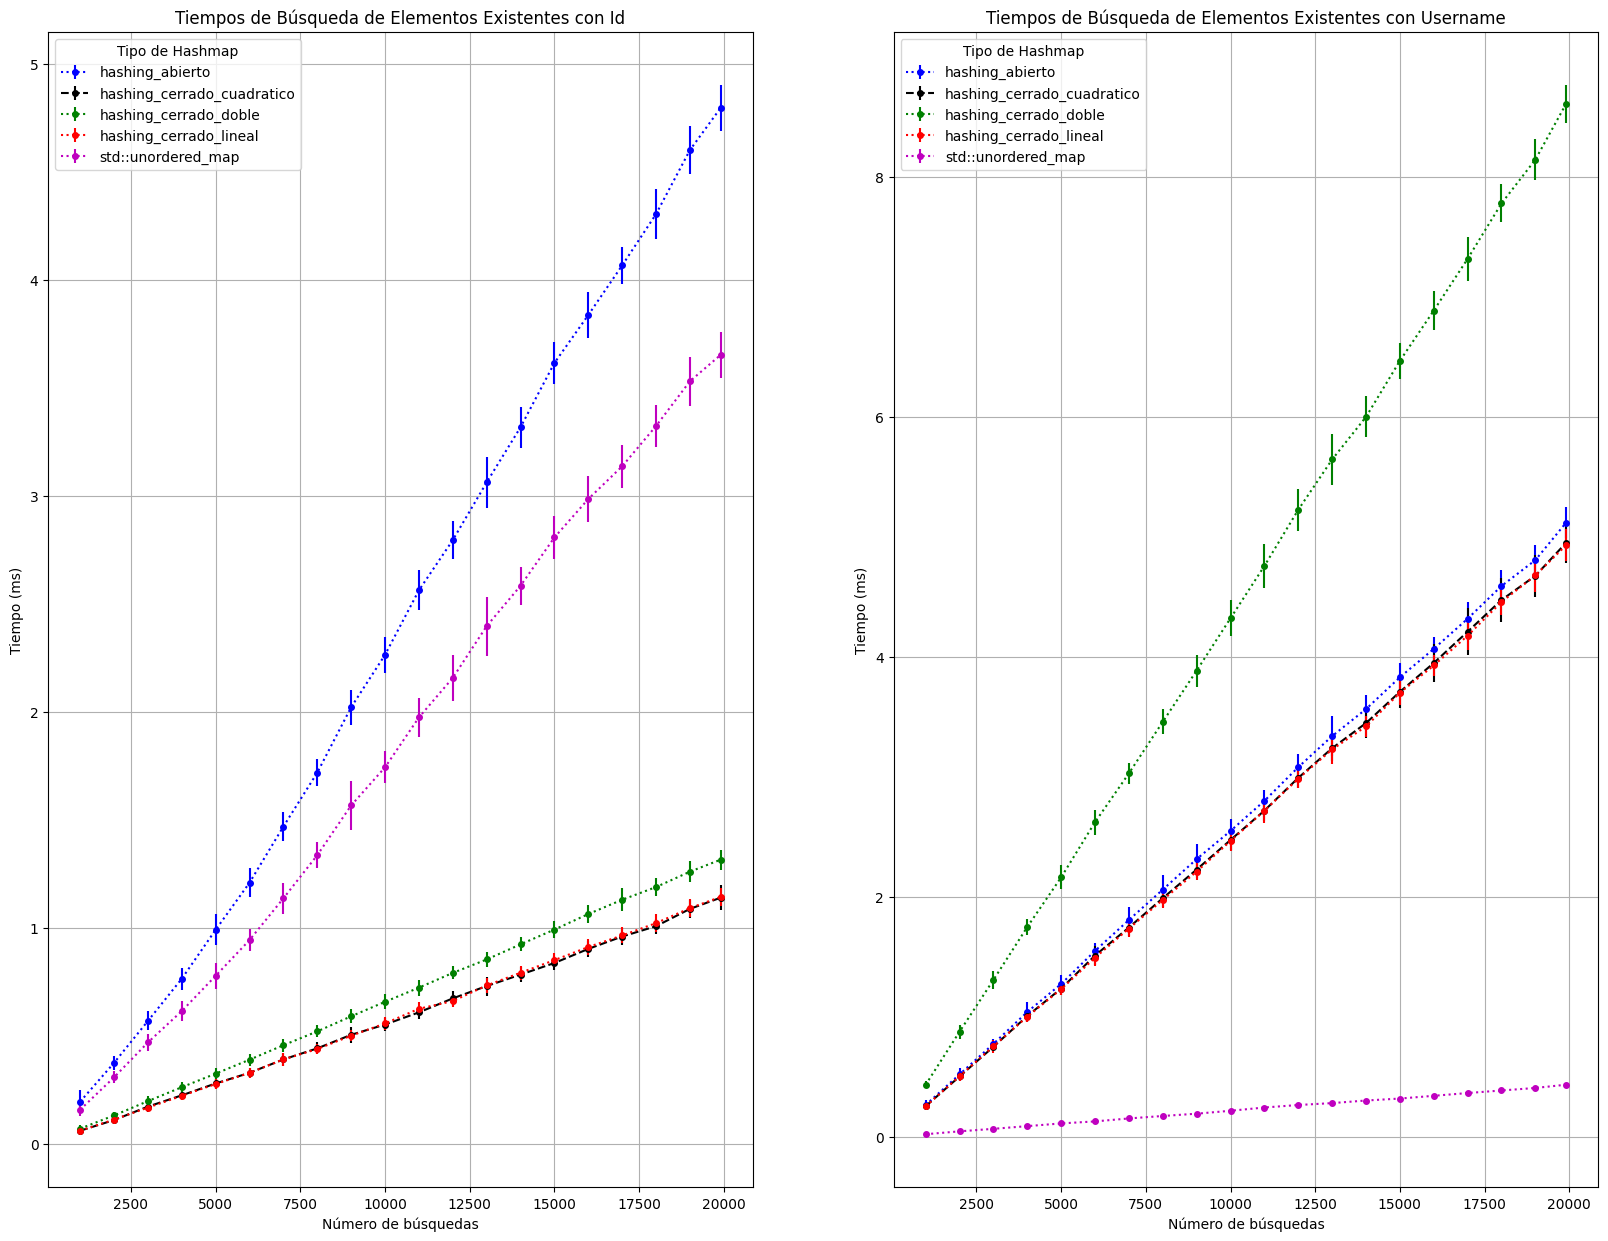

In [206]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,15))

styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i],yerr=grp["tiempo_err"])
    i += 1

for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de búsquedas")

axes[0].set(title="Tiempos de Búsqueda de Elementos Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos Existentes con Username")

plt.savefig("busquedas_1.png", bbox_inches="tight")
plt.show()

# Busquedas Tipo 2

In [207]:
df_id = pd.read_csv("busquedas2_id.csv")
df_usr = pd.read_csv("busquedas2_username.csv")
df_dv_id = pd.read_csv("dv_busquedas2_id.csv")
df_dv_usr = pd.read_csv("dv_busquedas2_username.csv")

print(df_id.head())
print(df_usr.head())

                         mapa      1000      2000      3000      4000  \
0             hashing_abierto  0.096520  0.181654  0.257892  0.338691   
1      hashing_cerrado_lineal  0.062618  0.119664  0.170345  0.225771   
2  hashing_cerrado_cuadratico  0.062360  0.118348  0.170942  0.225293   
3       hashing_cerrado_doble  0.073875  0.139339  0.202811  0.261006   
4          std::unordered_map  0.148857  0.302318  0.424745  0.547206   

       5000      6000      7000      8000      9000  ...     11000     12000  \
0  0.430571  0.502074  0.587614  0.663648  0.771740  ...  0.931655  1.042649   
1  0.282074  0.336197  0.393048  0.440301  0.498526  ...  0.612491  0.662111   
2  0.280557  0.334359  0.388497  0.435897  0.502377  ...  0.607815  0.663528   
3  0.329514  0.394033  0.457610  0.520548  0.586244  ...  0.713690  0.779330   
4  0.705643  0.832073  0.959039  1.093053  1.254314  ...  1.515417  1.684946   

      13000     14000     15000     16000     17000     18000     19000  \
0  1.

In [208]:
df_id_melted = df_id.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_usr_melted = df_usr.melt(id_vars="mapa", var_name="busquedas", value_name="tiempo")
df_id_melted["tiempo_err"] = df_dv_id.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]
df_usr_melted["tiempo_err"] = df_dv_usr.melt(id_vars="mapa", var_name="dv_busquedas", value_name="tiempo_err")["tiempo_err"]

print(df_id_melted.head())
print(df_usr_melted.head())

df_id_melted["busquedas"] = df_id_melted["busquedas"].astype(int)
df_usr_melted["busquedas"] = df_usr_melted["busquedas"].astype(int)

                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  0.096520    0.035131
1      hashing_cerrado_lineal      1000  0.062618    0.016784
2  hashing_cerrado_cuadratico      1000  0.062360    0.015786
3       hashing_cerrado_doble      1000  0.073875    0.018007
4          std::unordered_map      1000  0.148857    0.038683
                         mapa busquedas    tiempo  tiempo_err
0             hashing_abierto      1000  0.283615    0.044315
1      hashing_cerrado_lineal      1000  0.247804    0.030714
2  hashing_cerrado_cuadratico      1000  0.255069    0.036845
3       hashing_cerrado_doble      1000  0.436430    0.053229
4          std::unordered_map      1000  0.145397    0.058877


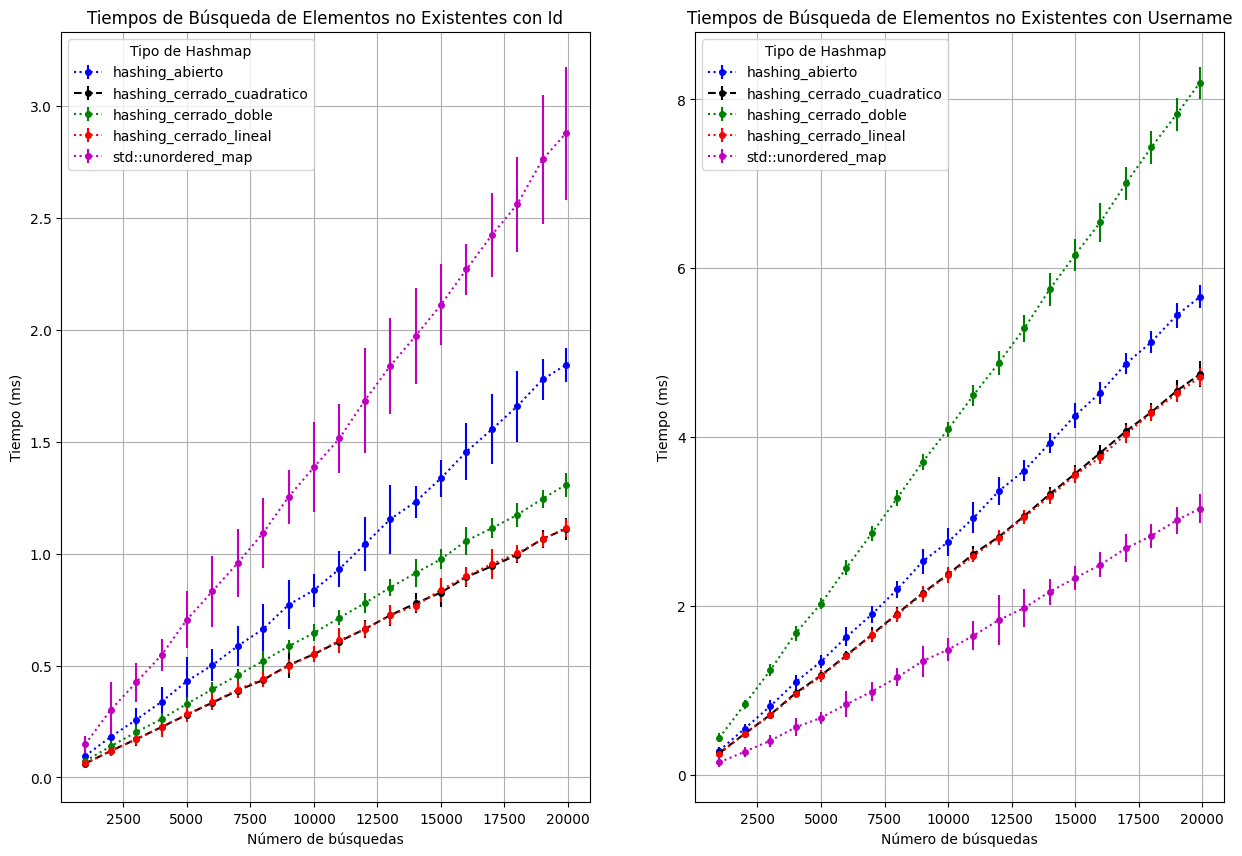

In [209]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,10))


styles = ["dotted", "dashed", "dotted", "dotted", "dotted"]
colors = ["b", "k", "g", "r", "m"]
i = 0
for key, grp in df_id_melted.groupby(["mapa"]):
    axes[0].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1

i = 0
for key, grp in df_usr_melted.groupby(["mapa"]):
    axes[1].errorbar(grp["busquedas"], grp["tiempo"], marker='o', markersize=4, linestyle=styles[i], label=key[0], color=colors[i], yerr=grp["tiempo_err"])
    i += 1
    
for ax in axes:
    ax.legend(title="Tipo de Hashmap")
    ax.grid(True)
    ax.set(ylabel="Tiempo (ms)", xlabel="Número de búsquedas")

axes[0].set(title="Tiempos de Búsqueda de Elementos no Existentes con Id")
axes[1].set(title="Tiempos de Búsqueda de Elementos no Existentes con Username")

plt.savefig("busquedas_2.png", bbox_inches="tight")
plt.show()